# Final Project (Part 5)
#### By Shubhankar Kumar

### 5. Technology associated with rapidly growing repositories (BigTech)

In [ ]:
commits_df = spark.read.parquet("gs://msca-bdp-students-bucket/shared_data/shubhankark/commits")

In [2]:
commits_df = commits_df.drop("commit", "author","committer", "tree", "parent", "subject", "trailer", "difference", "difference_truncated", "encoding")

In [4]:
commits_df = commits_df.drop("timestamp")

In [5]:
commits_df.show(5)

+--------------------+--------------------+
|             message|           repo_name|
+--------------------+--------------------+
|Can't you see I'm...|[smaslennikov/wha...|
|Merge branch 'mas...|[RaananW/Babylon....|
|duty cycle isn't ...|[Coderlane/c-bbb-...|
|Can't you see I'm...|[smaslennikov/wha...|
|Merge pull reques...|[reactioncommerce...|
+--------------------+--------------------+
only showing top 5 rows



In [9]:
from pyspark.sql.functions import col, explode, split


In [13]:
target_words = ["Meta", "Google", "Alphabet", "Microsoft", "Apple", "Amazon", "ChatGPT", "GitHub", "CoPilot", "StarCoder", "Llama"]
target_words_lower = [word.lower() for word in target_words]

In [14]:
words_df = (
    commits_df
    .select(explode(split(col("message"), " ")).alias("word"))
    .filter(col("word") != "")
)

In [15]:
word_counts_df = (
    words_df
    .filter(col("word").isin(target_words_lower))
    .groupBy("word")
    .count()
    .orderBy(col("count").desc())
)

In [16]:
word_counts_df.show()

+---------+------+
|     word| count|
+---------+------+
|   github|219210|
|     meta|163632|
|   google|134018|
|    apple| 11035|
|   amazon|  8987|
| alphabet|  4838|
|microsoft|  3069|
|    llama|   719|
|  copilot|   289|
|starcoder|     1|
+---------+------+



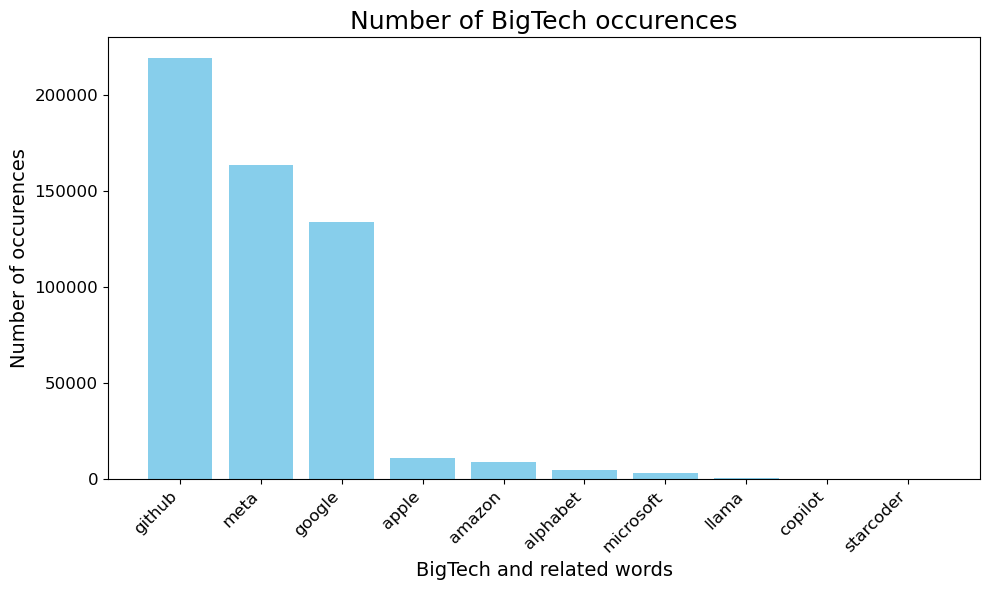

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

word_counts_pandas = word_counts_df.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(word_counts_pandas['word'], word_counts_pandas['count'], color='skyblue')
plt.xlabel('BigTech and related words', fontsize=14)
plt.ylabel('Number of occurences', fontsize=14)
plt.title('Number of BigTech occurences', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("bigtech.png")
plt.show()